<a href="https://colab.research.google.com/github/mvboas/curso_estatistica_com_python/blob/main/notebooks/An%C3%A1lise_Descritiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [2]:
url = "https://raw.githubusercontent.com/mvboas/curso_estatistica_com_python/main/dados/dados.csv"

In [3]:
dados = pd.read_csv('https://raw.githubusercontent.com/mvboas/curso_estatistica_com_python/main/dados/dados.csv')

### Visualize o conteúdo do DataFrame

In [4]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [7]:
# Verificando o valor mais alto de renda
dados.Renda.max()

200000

In [13]:
classes = [0, 1576, 3940, 11820, 19700, 200000]

### 2º Definir os labels das classes

In [14]:
labels = ['E','D','C','B','A']

### 3º Construir a coluna de frequências

In [18]:
frequencia= pd.value_counts(
    pd.cut(x = dados.Renda,
       bins = classes,
       include_lowest = True,
       labels = labels)
    )
frequencia

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [23]:
percentual = pd.value_counts(
    pd.cut(x = dados.Renda,
       bins = classes,
       include_lowest = True,
       labels = labels),
       normalize = True
    ) *100
percentual

E    64.751432
D    24.208745
C     9.423477
B     1.069755
A     0.546590
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [37]:
dist_freq = pd.DataFrame({'Frequencia': frequencia,
                          'Porcentagem (%)': percentual})
dist_freq = dist_freq.sort_values('Frequencia')
dist_freq = dist_freq.reset_index()
dist_freq

,index,Frequencia,Porcentagem (%)
0,A,420,0.546590
1,B,822,1.069755
2,C,7241,9.423477
3,D,18602,24.208745
4,E,49755,64.751432


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

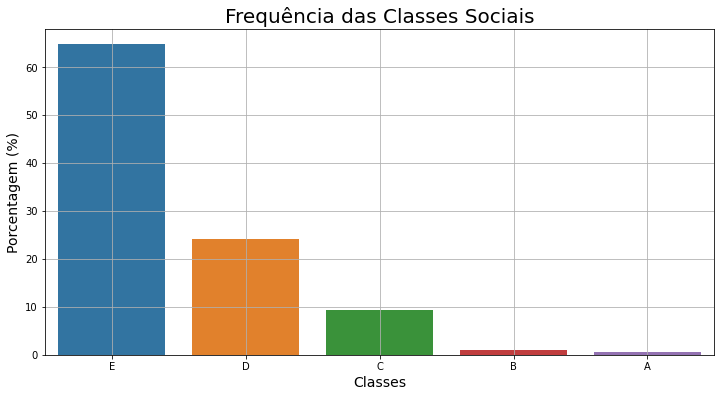

In [81]:
ax = sns.barplot(y = 'Porcentagem (%)', x = 'index', data = dist_freq)
ax.figure.set_size_inches(12,6)
ax.set_title('Frequência das Classes Sociais', fontsize = 20)
ax.set_xlabel('Classes', fontsize = 14)
ax.set_ylabel('Porcentagem (%)',fontsize = 14)
plt.grid()
plt.show()

> ### Conclusões

Através do gráfico, podemos observar que a distribuição de renda no Brasil é bastante deficitária. A maior parte da população está concentrada na classe E (aproximadamente 65%), ou seja, ganham até 2 salários mínimos. 1% estão na classe B (ganham de 15 a 25 salários mínimos) e 0,5% na classe A (acima de 25 salários mínimos). Abaixo, faremos uma análise da renda acumulada de todas as classes.

### Criando a coluna de classes no DataFrame dados

In [51]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [52]:
dados['Classe'] = ''


In [57]:
dados['Classe'] = pd.cut(bins = classes,
       labels = labels,
       include_lowest = True,
       x = dados.Renda)

In [64]:
soma_renda = dados[['Classe','Renda']].groupby('Classe').sum()

In [75]:
soma_renda['normalizada'] = soma_renda['Renda']/soma_renda['Renda'].sum()
soma_renda = soma_renda.reset_index()
soma_renda

,index,Classe,Renda,normalizada
0,0,E,42114432,0.273987
1,1,D,43848306,0.285267
2,2,C,43467247,0.282788
3,3,B,11864560,0.077188
4,4,A,12414900,0.080769


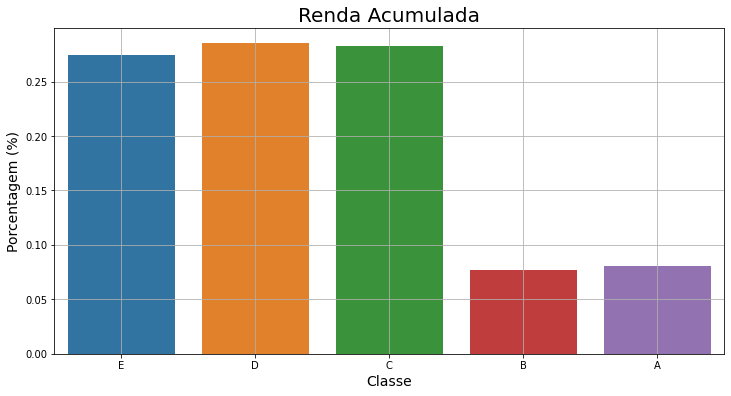

In [83]:
ax = sns.barplot(x = 'Classe', y = 'normalizada', data = soma_renda)
ax.set_title('Renda Acumulada', fontsize = 20)
ax.figure.set_size_inches(12,6)
ax.set_ylabel('Porcentagem (%)', fontsize = 14)
ax.set_xlabel('Classe', fontsize = 14)
plt.grid()
plt.show()

### Conclusões

Apesar de representarem apenas 1,5% da amostra, a renda acumulado dos indivíduos das classes A e B, representam 16% da renda total da amostra. Uma considerável concentração de renda nas mãos da minoria dos indivíduos da amostra

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


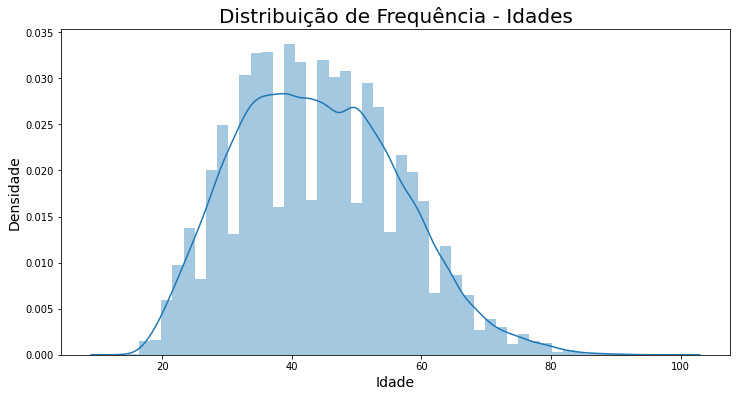

In [89]:
ax = sns.distplot(a=dados.Idade)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequência - Idades', fontsize = 20)
ax.set_ylabel('Densidade', fontsize = 14)
ax.set_xlabel('Idade', fontsize = 14)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


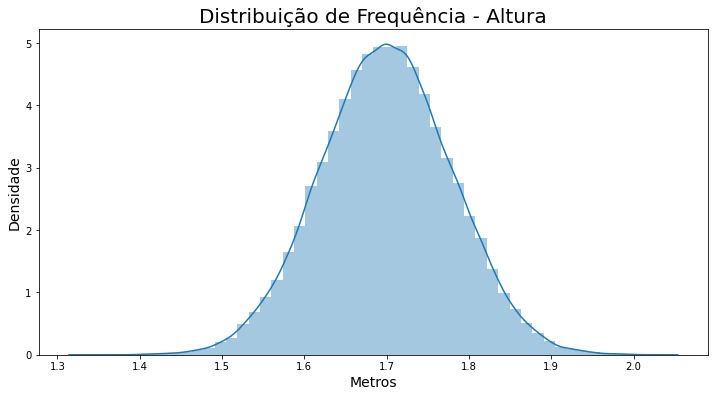

In [95]:
ax = sns.distplot(a=dados.Altura)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequência - Altura', fontsize = 20)
ax.set_ylabel('Densidade', fontsize = 14)
ax.set_xlabel('Metros', fontsize = 14)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


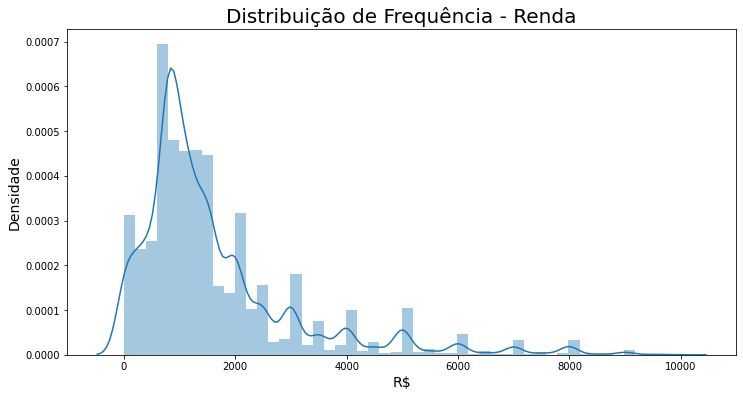

In [94]:
ax = sns.distplot(a=dados.query('Renda < 10000').Renda)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequência - Renda', fontsize = 20)
ax.set_ylabel('Densidade', fontsize = 14)
ax.set_xlabel('R$', fontsize = 14)
plt.show()

> ### Conclusões

Quanto a distribuição das idades, vemos uma concentração em torno de 40 anos. Além disso, também vemos que há uma assimetria à direita, com alguns indivíduos que chegam em idades bem avançadas.

Em relação à altura, observamos uma distribuição que se assemelha muito a uma normal, com uma concentração no centro e não há assimetria muito clara à esquerda ou direita.

Por fim, podemos observar que a renda também apresenta uma assimetria à direita, com indivíduos que tem uma renda bastante elevada. O que chama atenção, são pequenos picos e vales ao longo da reta. O que me faz pensar se existem alguns pontos de equilíbrios locais, onde a renda do indivíduo tenda a se estabilizar. Isso poderia ser verificado com um estudo que acompanhe a renda dos indivíduos ao longo do tempo

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


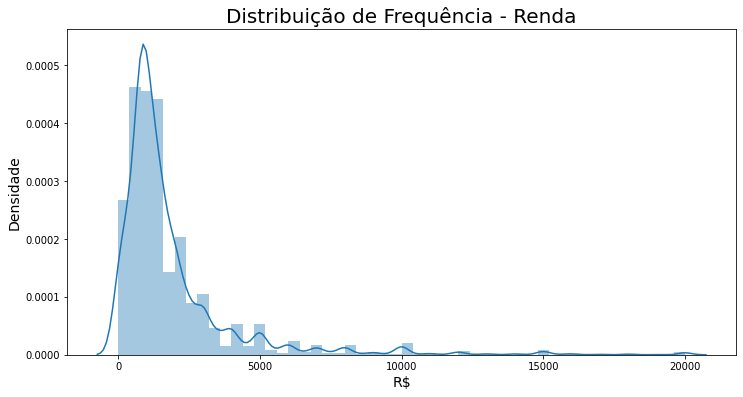

In [96]:
ax = sns.distplot(a=dados.query('Renda <= 20000').Renda)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequência - Renda', fontsize = 20)
ax.set_ylabel('Densidade', fontsize = 14)
ax.set_xlabel('R$', fontsize = 14)
plt.show()

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [100]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [101]:
frequencia = pd.crosstab(index = dados.Sexo,
                         columns = dados.Cor)
frequencia.rename(index = sexo, inplace = True)
frequencia.rename(columns = cor, inplace = True)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [133]:
percentual = pd.crosstab(index = dados.Sexo,
                         columns = dados.Cor,
                         normalize = True)
percentual.rename(index = sexo, inplace = True)
percentual.rename(columns = cor, inplace = True)
percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.003332,0.288834,0.071603,0.003058,0.326171
Feminino,0.001314,0.125208,0.037598,0.001523,0.141359


In [143]:
masculino = percentual.loc['Masculino'].sum()
masculino

0.6929984383133785

In [144]:
feminino = percentual.loc['Feminino'].sum()
feminino


0.30700156168662157

In [147]:
parda = percentual['Parda'].sum()
parda

0.4675299323269131

In [149]:
amarela = percentual['Amarela'].sum()*100
amarela

0.45809474232170744

> ### Conclusões

Podemos observar que a maior parte dos indivíduos da amostra são do sexo masculino (aproximadamente 70%). Além disso, verificamos que a maior parte dos respondentes são da cor parda (46,75%) e minoria são da cor amarela (0,46%)

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [151]:
dados.Renda.mean()

2000.3831988547631

### Obtenha a mediana

In [152]:
dados.Renda.median()

1200.0

### Obtenha a moda

In [154]:
dados.Renda.mode()

0    788
dtype: int64

### Obtenha o desvio médio absoluto

In [157]:
dados.Renda.mad()

1526.4951371644931

### Obtenha a variância

In [158]:
dados.Renda.var()

11044906.00622118

### Obtenha o desvio-padrão

In [159]:
dados.Renda.std()

3323.3877303470294

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [179]:
frequencia = pd.crosstab(values = dados.Renda,
            index = dados.Sexo,
            columns = dados.Cor,
            aggfunc = {'mean', 'median', 'max'})
frequencia.rename(index = sexo, inplace=True)
frequencia.rename(columns = cor, inplace=True)
frequencia



max                              ...  median                        
Cor        Indígena    Branca    Preta  Amarela  ...  Branca   Preta Amarela   Parda
Sexo                                             ...                                
Masculino   10000.0  200000.0  50000.0  50000.0  ...  1700.0  1200.0  2800.0  1200.0
Feminino   120000.0  100000.0  23000.0  20000.0  ...  1200.0   800.0  1500.0   800.0

[2 rows x 15 columns]

> ### Conclusões

Ao observar a tabela, podemos verificar que existe uma diferença de rendimentos entre os sexos. A média dos rendimentos dos homens são superiores a das mulheres para todas as cores, exceto para os indígenas. Isso ocorre devido a existência de um outlier na base de dados, que "puxa" a média para cima. Se observamos a mediana, verifica-se que o padrão se mantém consistente (pessoas do sexo masculino ganhando mais). Ademais, podemos observar que existe uma clara disparidade quanto as cores, os indivíduos de cor amarela possuem uma mediana maior que os demais, e os indígenas são os que possuem menor rendimento, quando observa-se a mediana

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [180]:
frequencia = pd.crosstab(values = dados.Renda,
            index = dados.Sexo,
            columns = dados.Cor,
            aggfunc = {'mad', 'var', 'std'})
frequencia.rename(index = sexo, inplace=True)
frequencia.rename(columns = cor, inplace=True)
frequencia

mad               ...           var              
Cor           Indígena       Branca  ...       Amarela         Parda
Sexo                                 ...                            
Masculino   798.910889  2261.012346  ...  3.295707e+07  5.345747e+06
Feminino   3007.892952  1670.967106  ...  1.392166e+07  2.547960e+06

[2 rows x 15 columns]

> ### Conclusões

Escreva suas conclusões aqui...

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

> ### Conclusões

Escreva suas conclusões aqui...

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [ ]:
from scipy import stats



### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

> ### Conclusões

Escreva suas conclusões aqui...